### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Load Dataset

In [2]:
df=pd.read_csv('beer production.csv')
df.head()

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [3]:
df.shape

(476, 2)

In [4]:
df.tail()

,Month,Monthly beer production
471,1995-04,127.0
472,1995-05,151.0
473,1995-06,130.0
474,1995-07,119.0
475,1995-08,153.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    476 non-null    object 
 1   Monthly beer production  476 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.6+ KB


In [6]:
df.isnull().sum()

Month                      0
Monthly beer production    0
dtype: int64

In [7]:
df.describe()

,Monthly beer production
count,476.000000
mean,136.395378
std,33.738725
min,64.800000
25%,112.900000
50%,139.150000
75%,158.825000
max,217.800000


In [8]:
#parsing string as datetime

df['Month']=pd.to_datetime(df['Month'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    476 non-null    datetime64[ns]
 1   Monthly beer production  476 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.6 KB


In [10]:
df=df.sort_values(by='Month')

In [11]:
df.head()

,Month,Monthly beer production
0,1956-01-01,93.2
1,1956-02-01,96.0
2,1956-03-01,95.2
3,1956-04-01,77.1
4,1956-05-01,70.9


In [12]:
quterly_data=df.resample('Q',on='Month').sum()

In [13]:
quterly_data.head()

,Monthly beer production
Month,
1956-03-31,284.4
1956-06-30,212.8
1956-09-30,226.9
1956-12-31,308.4
1957-03-31,262.0


In [14]:
quterly_data.shape

(159, 1)

In [15]:
df=df.set_index('Month')

In [16]:
df.columns=['Monthly_beer_production']

In [17]:
df

,Monthly_beer_production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9
...,...
1995-04-01,127.0
1995-05-01,151.0
1995-06-01,130.0


<AxesSubplot:xlabel='Month'>

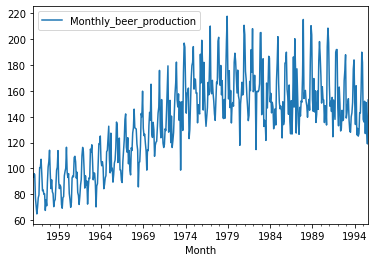

In [18]:
df.plot()

<AxesSubplot:xlabel='Month'>

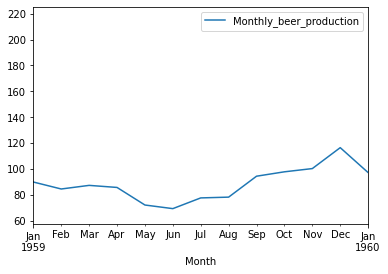

In [19]:
df.plot(xlim=['1959','1960'])

<AxesSubplot:xlabel='Month'>

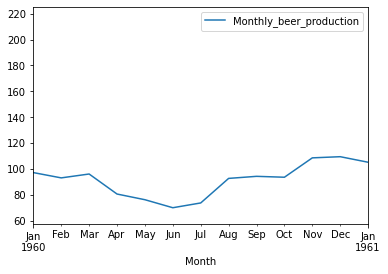

In [20]:
df.plot(xlim=['1960','1961'])

### Adfuller Test

In [21]:
from statsmodels.tsa.stattools import adfuller

In [22]:
x=df['Monthly_beer_production'].values
result=adfuller(x)

print('p_val:',result[1])
print('ADF stats:',result[0])

p_val: 0.17762099829132294
ADF stats: -2.2826614187875833


In [23]:
result[4]

{'1%': -3.4447087976702284,
 '5%': -2.867871300049488,
 '10%': -2.5701423432047443}

### Test Stationarity

In [24]:
def test_stationarity(timeseries, window=12, cutoff=0.05):
    
    #determining rolling statistics
    rolmean=timeseries.rolling(window).mean()
    rolstd=timeseries.rolling(window).std()
    
    #plot rolling statitics
    fig=plt.figure(figsize=(12,8))
    orig=plt.plot(timeseries,color='blue',label='Original')
    mean=plt.plot(rolmean,color='red',label='Rolling mean')
    std=plt.plot(rolstd,color='black',label='Rolling std')
    plt.legend(loc='best')
    plt.title('Rolling mean and std')
    plt.show()
    
    #perform dickey fuller test
    print("Results of dickey fuller's test:")
    dftest=adfuller(timeseries,autolag='AIC',maxlag=20)
    dfoutput=pd.Series(dftest[0:4],index=['Test statistics','p-value','#lags used','Number of observations used'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical value (%s)' %key]=value
        
    p_value=dftest[1]
    
    if p_value < cutoff:
        print('p_value= %.4f. \nThe series is likely stationary' %p_value)
    else:
        print('p_value= %.4f. \nThe series is likely non-stationary' %p_value)
    
    print(dfoutput)

In [25]:
df.head()

,Monthly_beer_production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


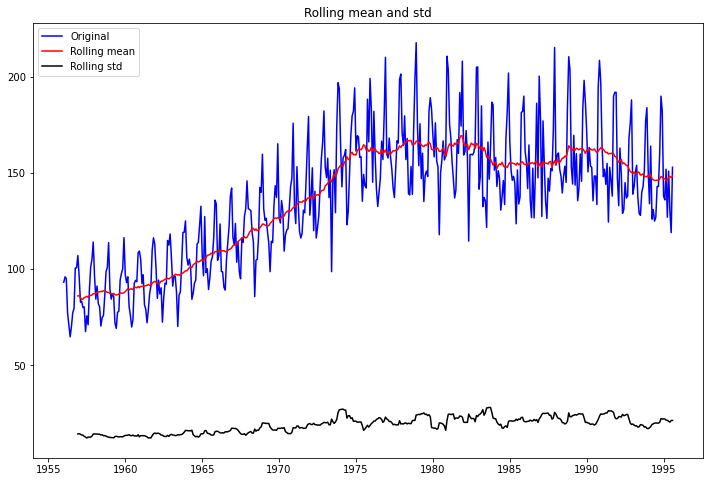

Results of dickey fuller's test:
p_value= 0.2842. 
The series is likely non-stationary
Test statistics                 -2.005361
p-value                          0.284227
#lags used                      20.000000
Number of observations used    455.000000
Critical value (1%)             -3.444804
Critical value (5%)             -2.867913
Critical value (10%)            -2.570165
dtype: float64


In [26]:
test_stationarity(df['Monthly_beer_production'])

In [27]:
df['log']=np.log(df['Monthly_beer_production'])

In [28]:
df.head()

,Monthly_beer_production,log
Month,,
1956-01-01,93.2,4.534748
1956-02-01,96.0,4.564348
1956-03-01,95.2,4.555980
1956-04-01,77.1,4.345103
1956-05-01,70.9,4.261270


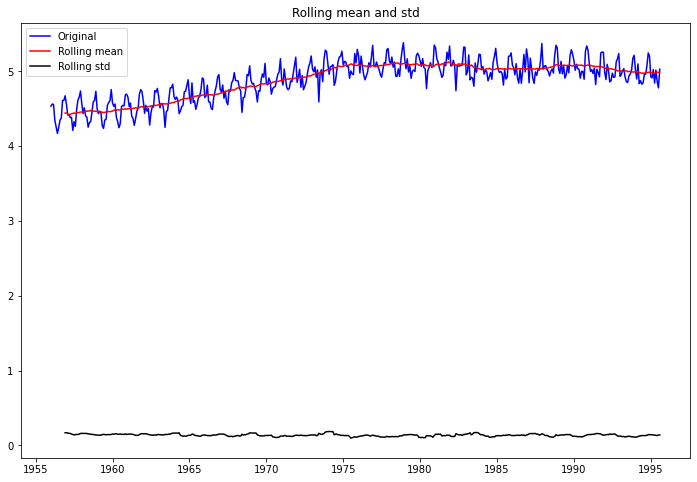

Results of dickey fuller's test:
p_value= 0.1576. 
The series is likely non-stationary
Test statistics                 -2.346001
p-value                          0.157561
#lags used                      20.000000
Number of observations used    455.000000
Critical value (1%)             -3.444804
Critical value (5%)             -2.867913
Critical value (10%)            -2.570165
dtype: float64


In [29]:
test_stationarity(df['log'])

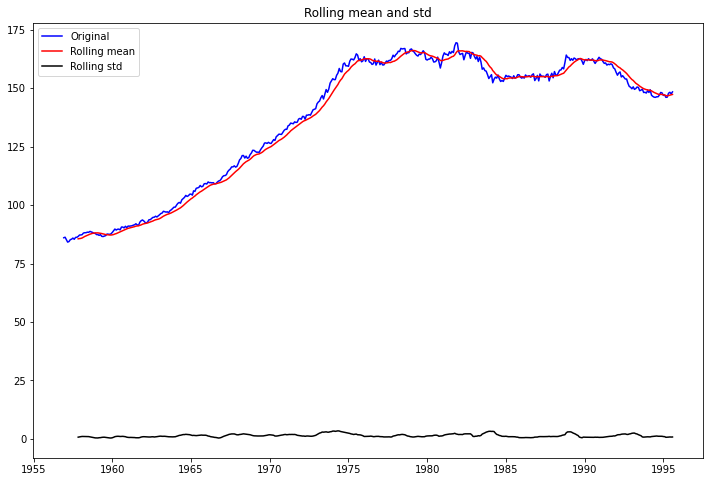

Results of dickey fuller's test:
p_value= 0.3250. 
The series is likely non-stationary
Test statistics                 -1.915120
p-value                          0.324982
#lags used                      18.000000
Number of observations used    446.000000
Critical value (1%)             -3.445097
Critical value (5%)             -2.868042
Critical value (10%)            -2.570233
dtype: float64


In [30]:
df['roll_mean']=df['Monthly_beer_production'].rolling(window=12).mean()

test_stationarity(df['roll_mean'].dropna())

In [31]:
df['first difference']=df['Monthly_beer_production']-df['Monthly_beer_production'].shift(1)

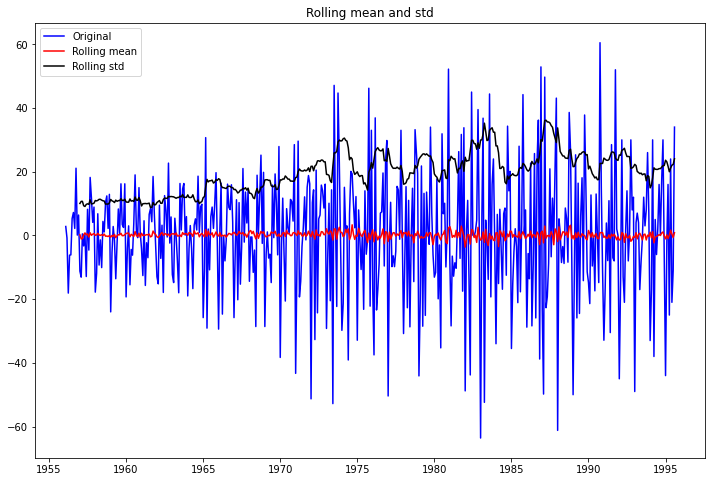

Results of dickey fuller's test:
p_value= 0.0178. 
The series is likely stationary
Test statistics                 -3.240169
p-value                          0.017774
#lags used                      20.000000
Number of observations used    454.000000
Critical value (1%)             -3.444836
Critical value (5%)             -2.867927
Critical value (10%)            -2.570172
dtype: float64


In [32]:
test_stationarity(df['first difference'].dropna())

In [33]:
new_df=df.copy()
new_df.dropna(inplace=True)
new_df

,Monthly_beer_production,log,roll_mean,first difference
Month,,,,
1956-12-01,107.1,4.673763,86.041667,6.4
1957-01-01,95.9,4.563306,86.266667,-11.2
1957-02-01,82.8,4.416428,85.166667,-13.1
1957-03-01,83.3,4.422449,84.175000,0.5
1957-04-01,80.0,4.382027,84.416667,-3.3
...,...,...,...,...
1995-04-01,127.0,4.844187,146.166667,-25.0
1995-05-01,151.0,5.017280,147.833333,24.0
1995-06-01,130.0,4.867534,148.250000,-21.0


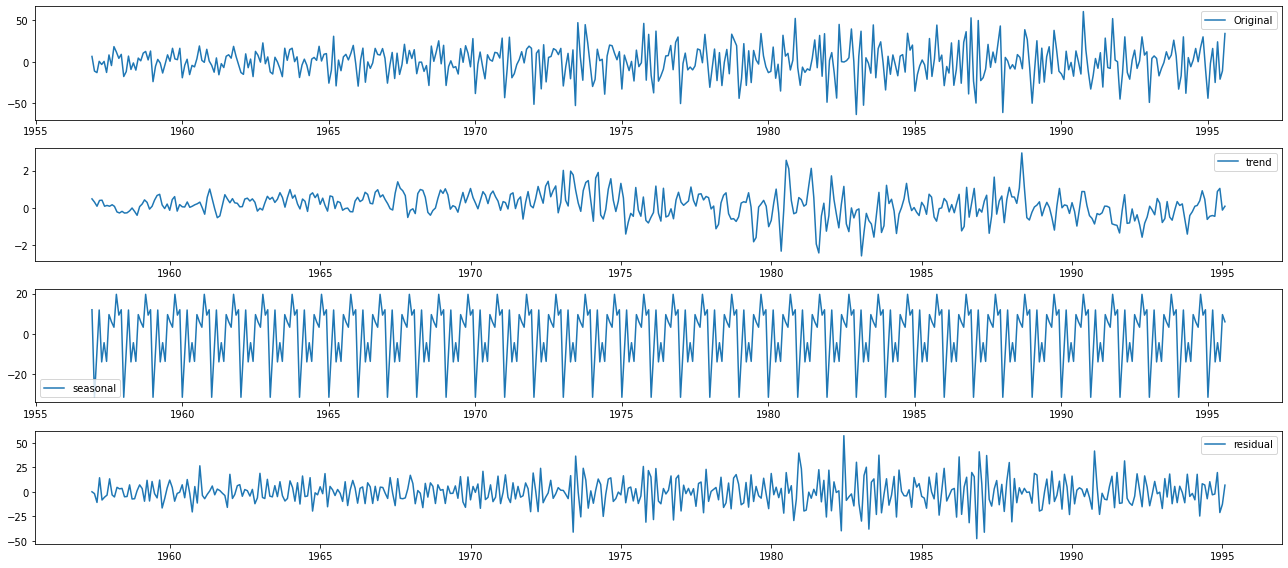

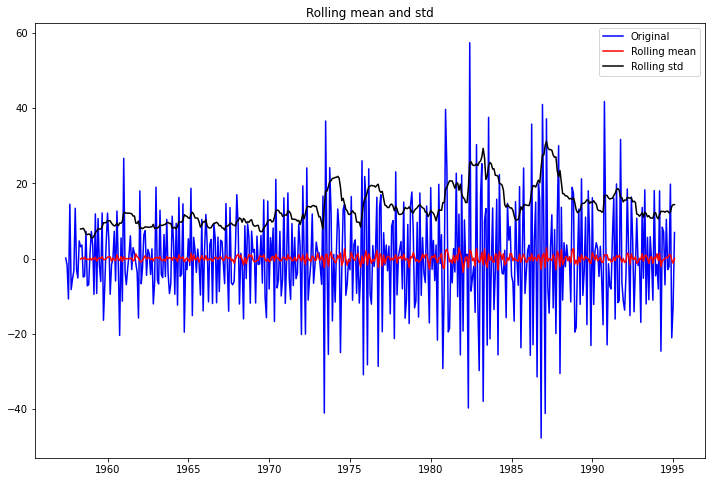

Results of dickey fuller's test:
p_value= 0.0000. 
The series is likely stationary
Test statistics               -1.273526e+01
p-value                        9.190128e-24
#lags used                     1.900000e+01
Number of observations used    4.330000e+02
Critical value (1%)           -3.445543e+00
Critical value (5%)           -2.868238e+00
Critical value (10%)          -2.570338e+00
dtype: float64


In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition=seasonal_decompose(new_df['first difference'])

trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

plt.figure(figsize=(18,8))
plt.subplot(411)
plt.plot(new_df['first difference'],label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend,label='trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual,label='residual')
plt.legend(loc='best')
plt.tight_layout()

decompose_log_data= residual
decompose_log_data.dropna(inplace=True)
test_stationarity(decompose_log_data)

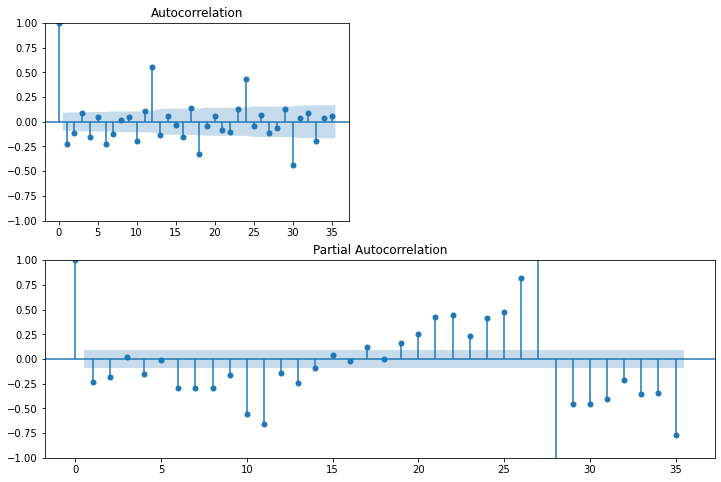

In [35]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(221)
fig=sm.graphics.tsa.plot_acf(new_df['first difference'],lags=35,ax=ax1)
ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(new_df['first difference'],lags=35,ax=ax2)

### Plot acf and pacf

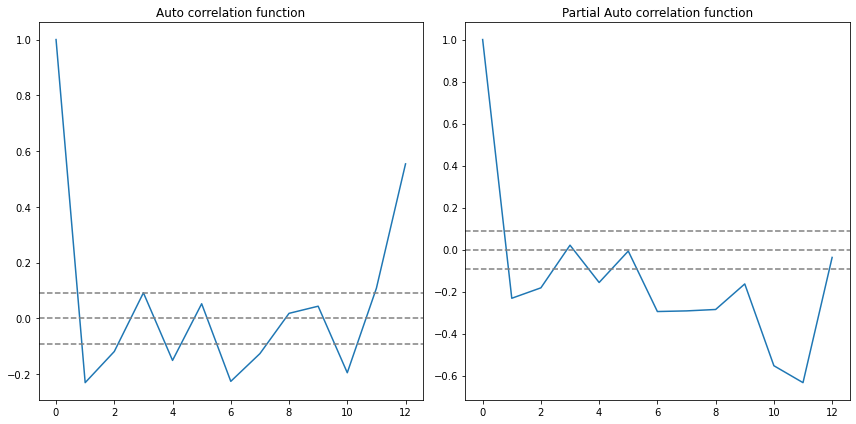

In [36]:
from statsmodels.tsa.stattools import acf,pacf

lag_acf=acf(new_df['first difference'],nlags=12)
lag_pacf=pacf(new_df['first difference'],nlags=12,method='ols')

plt.figure(figsize=(12,6))
#plot acf
plt.subplot(121)
plt.plot(lag_acf)

#plot axis ([ximn,xmax,ymin,ymax])
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(new_df)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(new_df)),linestyle='--',color='gray')
plt.title('Auto correlation function')

#plot pacf
plt.subplot(122)
plt.plot(lag_pacf)

#plot axis ([ximn,xmax,ymin,ymax])
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(new_df)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(new_df)),linestyle='--',color='gray')
plt.title('Partial Auto correlation function')
plt.tight_layout()

### Arima Model

In [40]:
#grid search ARIMA parameter for timeseries

import warnings
from math import sqrt
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

#evaluate ARIMA model for given order (p,d,q)

def evaluate_arima_model(X,arima_order):
    #preparing training dataset
    train_size=int(len(X)*0.66)
    train, test = X[0:train_size],X[train_size:]
    history=[x for x in train]
    
    #make prediction
    predictions=list()
    for t in range(len(test)):
        model=ARIMA(history,order=arima_order)
        model_fit=model.fit()
        yhat=model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
        
    #calculate out oof sample error
    rmse =sqrt(mean_squared_error(test,predictions))
    return rmse
    
#evaluate combination of p,d,q value for Arima model

def evaluate_model(datset,p_values,d_values,q_values):
    dataset=dataset.astype('float32')
    best_score,best_cfg= float('int'),None
    for p in p_values:
        for d in d_values:
            order=(p,d,q)
            try:
                rmse=evaluate_arima_model(dataset,order)
                if rmse < best_score:
                    best_score, best_cfg= rmse, order
                print('ARIMA%s RMSE=%.3f'% (order, rmse))
            except:
                continue
    print('Best ARIMA%  RMSE=%.3f' %(best_cfg,best_score))
    
#load_dataset
def parser(x):
    return datetime.strptime('190'+ x, '%Y-%m')

series=new_df['first difference']

#evaluate parameter
p_values=range(2,3)
d_values=range(0,3)
q_values=range(2,4)

warings.filterwarnings('ignore')
evaluate_model(series.values,p_values,d_values)